Importing Libraries and Loading Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# Load Dataset

data = pd.read_csv("/content/student_data_ai.csv")

# Display basic information
print("Dataset Overview:")
print(data.head())

print("\nDataset Structure:")
print(data.info())





Dataset Overview:
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes     

Data Exploration and Visualization

<ipython-input-3-ee06f0029b47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Class', palette='viridis')


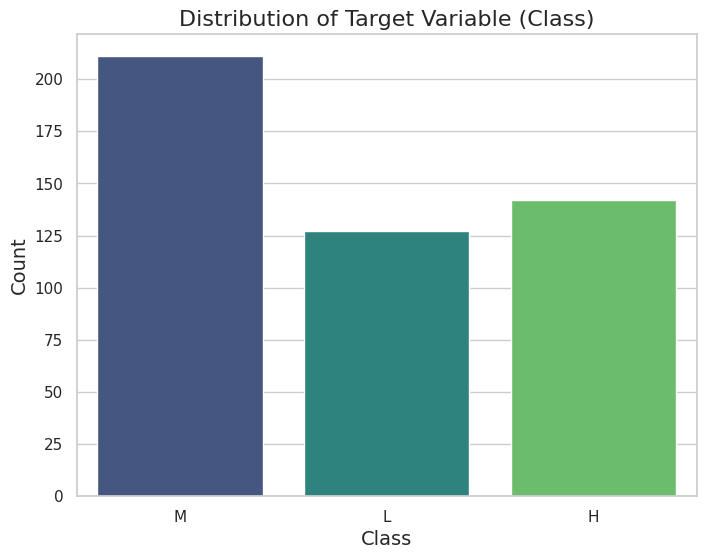

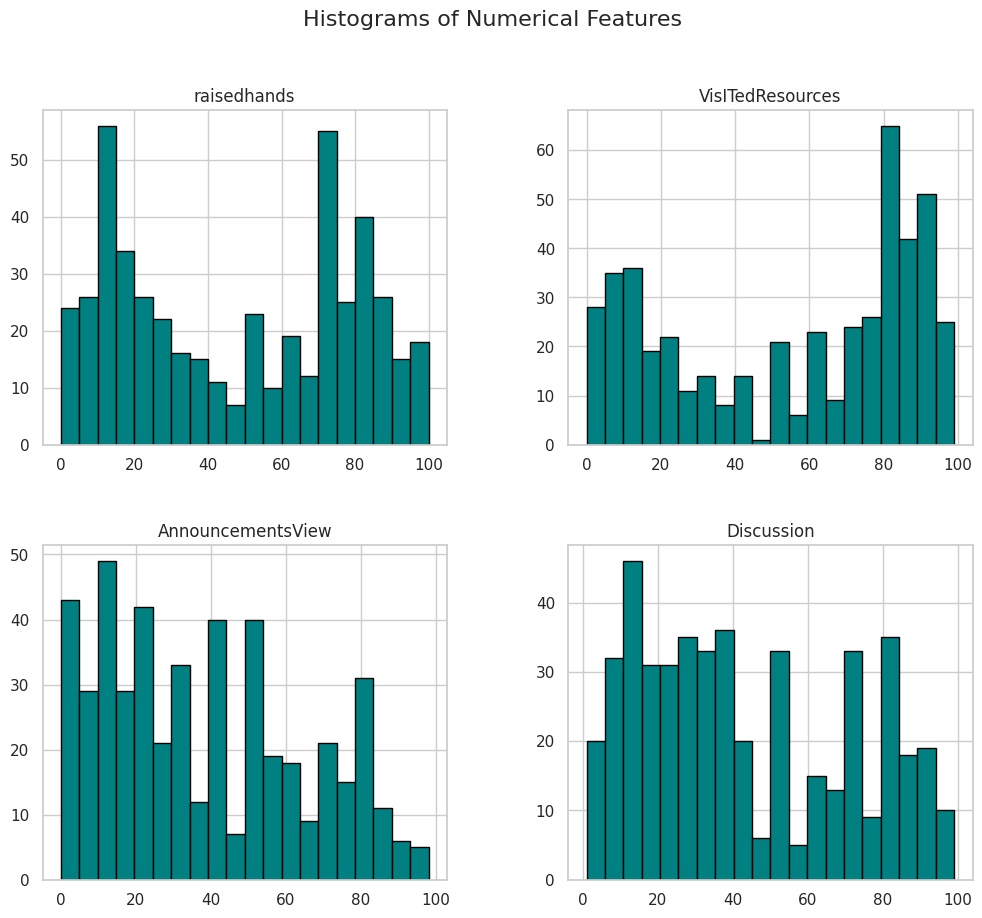

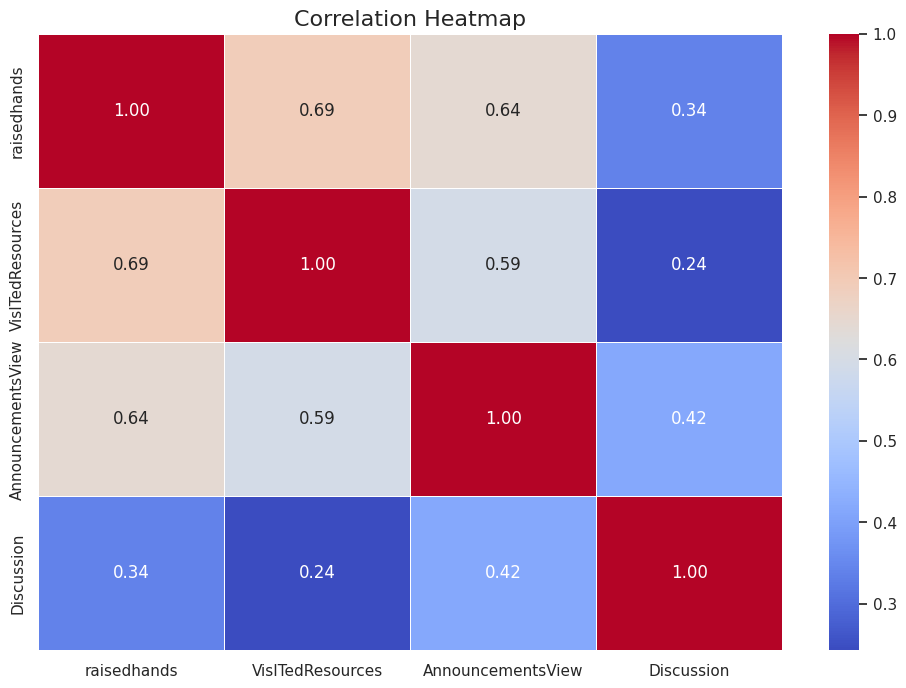

<ipython-input-3-ee06f0029b47>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Class', y='raisedhands', palette='Set2')


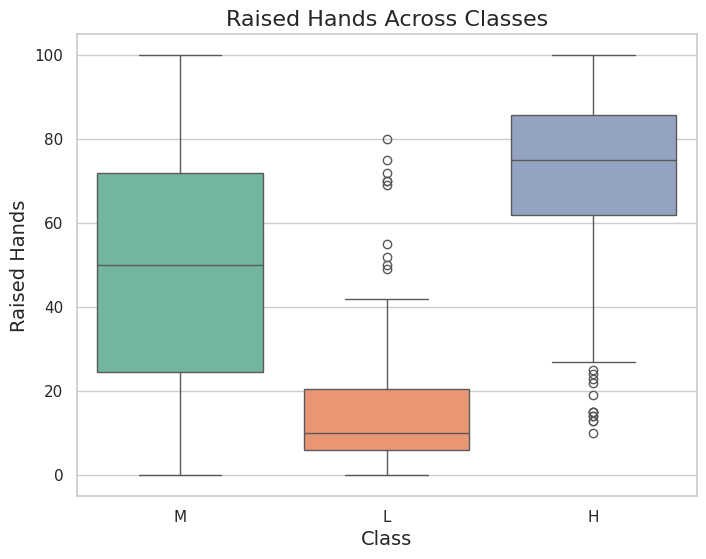

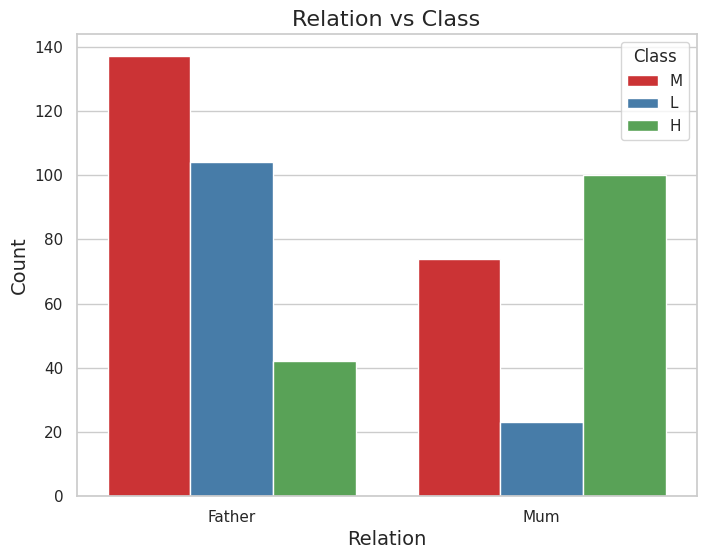

In [3]:
sns.set(style="whitegrid")

# Plot target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class', palette='viridis')
plt.title('Distribution of Target Variable (Class)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Select numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
data[numerical_columns].hist(figsize=(12, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

# Compute correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Example: raisedhands vs Class
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='raisedhands', palette='Set2')
plt.title('Raised Hands Across Classes', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Raised Hands', fontsize=14)
plt.show()

# Example: Relation
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Relation', hue='Class', palette='Set1')
plt.title('Relation vs Class', fontsize=16)
plt.xlabel('Relation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Class')
plt.show()


Data Preprocessing and Splitting

In [25]:
print(data.head())  # Check the first few rows

# Encode categorical features
label_encoders = {}
categorical_columns = data.select_dtypes(include='object').columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

if 'label_encoders' in globals():
    for col, le in label_encoders.items():
        mapping_df = pd.DataFrame({
            "Original": le.classes_,
            "Encoded": le.transform(le.classes_)
        })
        print(f"Column: {col}")
        print(mapping_df)
        print("\\n")
else:
    print("Label encoders dictionary not found. Make sure encoding was performed correctly.")

# Separate features and target variable
X = data.drop(columns=['Class'])  # Ensure 'Class' matches the target column name
y = data['Class']  # Ensure 'Class' matches the target column name

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



   gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0       1            4             4        2        1          0      7   
1       1            4             4        2        1          0      7   
2       1            4             4        2        1          0      7   
3       1            4             4        2        1          0      7   
4       1            4             4        2        1          0      7   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20             

Implementing and Evaluating a Linear Regression Model

In [26]:
# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate the Linear Regression model
y_pred_lr = lr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("\nLinear Regression Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Predict a new data point
print("\nEnter the values for the new data point:")
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the value for the new data point
new_prediction = lr_model.predict(new_data_scaled)
print(f"\nPrediction for the new data: {new_prediction[0]}")



Linear Regression Evaluation:
Mean Squared Error: 0.6847753988081614
R-squared: 0.05056565737685925

Enter the values for the new data point:
Enter value for gender: 1
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 1
Enter value for StageID: 1
Enter value for GradeID: 1
Enter value for SectionID: 0
Enter value for Topic: 1
Enter value for Semester: 1
Enter value for Relation: 1
Enter value for raisedhands: 1
Enter value for VisITedResources: 1
Enter value for AnnouncementsView: 1
Enter value for Discussion: 1
Enter value for ParentAnsweringSurvey: 1
Enter value for ParentschoolSatisfaction: 1
Enter value for StudentAbsenceDays: 1

Prediction for the new data: 0.5565054106939875


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Training and Evaluation

Support Vector Machine (SVM) Classifier

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model
y_pred = svm_model.predict(X_test_scaled)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred))
print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy: {accuracy}")

# Predict a new data point
print("\nEnter the values for the new data point:")
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
new_prediction = svm_model.predict(new_data_scaled)

# Decode the predicted class
predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0]
print(f"\nPrediction for the new data: {predicted_class}")



SVM Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        29
           1       0.87      0.80      0.83        25
           2       0.64      0.69      0.67        42

    accuracy                           0.69        96
   macro avg       0.71      0.69      0.70        96
weighted avg       0.69      0.69      0.69        96


SVM Confusion Matrix:
[[17  0 12]
 [ 1 20  4]
 [10  3 29]]

SVM Accuracy: 0.6875

Enter the values for the new data point:
Enter value for gender: 1
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 1
Enter value for StageID: 1
Enter value for GradeID: 1
Enter value for SectionID: 1
Enter value for Topic: 1
Enter value for Semester: 1
Enter value for Relation: 1
Enter value for raisedhands: 1
Enter value for VisITedResources: 1
Enter value for AnnouncementsView: 1
Enter value for Discussion: 1
Enter value for ParentAnsweringSurvey: 1
Enter value for ParentschoolSatisfactio

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Decision Tree Classifier Implementation and Prediction

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Evaluate the Decision Tree model
y_pred_dt = dt_model.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Accuracy: {dt_accuracy}")

# Predict a new data point
print("\nEnter the values for the new data point:")
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
new_prediction = dt_model.predict(new_data_scaled)

# Decode the predicted class
predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0]
print(f"\nPrediction for the new data: {predicted_class}")



Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.88      0.88      0.88        26
           2       0.80      0.77      0.79        48

    accuracy                           0.79        96
   macro avg       0.79      0.79      0.79        96
weighted avg       0.79      0.79      0.79        96


Decision Tree Confusion Matrix:
[[16  0  6]
 [ 0 23  3]
 [ 8  3 37]]

Decision Tree Accuracy: 0.7916666666666666

Enter the values for the new data point:
Enter value for gender: 0
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 1
Enter value for StageID: 1
Enter value for GradeID: 2
Enter value for SectionID: 1
Enter value for Topic: 0
Enter value for Semester: 1
Enter value for Relation: 0
Enter value for raisedhands: 15
Enter value for VisITedResources: 20
Enter value for AnnouncementsView: 23
Enter value for Discussion: 0
Enter value for ParentAnsweringSurv

K-Nearest Neighbors (KNN) Classifier Implementation and Prediction

In [ ]:
# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test_scaled)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"\nKNN Accuracy: {knn_accuracy}")

# Predict a new data point
print("\nEnter the values for the new data point:")
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
new_prediction = knn_model.predict(new_data_scaled)

# Decode the predicted class
predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0]
print(f"\nPrediction for the new data: {predicted_class}")



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.73      0.92      0.81        26
           2       0.76      0.67      0.71        48

    accuracy                           0.72        96
   macro avg       0.70      0.73      0.71        96
weighted avg       0.72      0.72      0.71        96


KNN Confusion Matrix:
[[13  0  9]
 [ 1 24  1]
 [ 7  9 32]]

KNN Accuracy: 0.71875

Enter the values for the new data point:
Enter value for gender: 0
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 1
Enter value for StageID: 1
Enter value for GradeID: 0
Enter value for SectionID: 1
Enter value for Topic: 0
Enter value for Semester: 1
Enter value for Relation: 0
Enter value for raisedhands: 0
Enter value for VisITedResources: 1
Enter value for AnnouncementsView: 2
Enter value for Discussion: 1
Enter value for ParentAnsweringSurvey: 2
Enter value for ParentschoolSatisfacti

Naive Bayes Classifier Implementation and Prediction

In [ ]:
# Train the Naive Bayes model
nb_model = GaussianNB()  # Using Gaussian Naive Bayes for continuous features
nb_model.fit(X_train_scaled, y_train)

# Evaluate the Naive Bayes model
y_pred_nb = nb_model.predict(X_test_scaled)
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("\nNaive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy}")

# Predict a new data point
print("\nEnter the values for the new data point:")

# Collect feature values from the user
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
new_prediction = nb_model.predict(new_data_scaled)

# Decode the predicted class (if necessary, depending on the encoding of the target)
predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0] if 'Class' in label_encoders else new_prediction[0]
print(f"\nPrediction for the new data: {predicted_class}")




Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.77      0.92      0.84        26
           2       0.87      0.71      0.78        48

    accuracy                           0.80        96
   macro avg       0.79      0.83      0.81        96
weighted avg       0.81      0.80      0.80        96


Naive Bayes Confusion Matrix:
[[19  0  3]
 [ 0 24  2]
 [ 7  7 34]]
Accuracy: 0.8020833333333334

Enter the values for the new data point:
Enter value for gender: 0
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 0
Enter value for StageID: 1
Enter value for GradeID: 1
Enter value for SectionID: 1
Enter value for Topic: 0
Enter value for Semester: 1
Enter value for Relation: 1
Enter value for raisedhands: 0
Enter value for VisITedResources: 1
Enter value for AnnouncementsView: 0
Enter value for Discussion: 1
Enter value for ParentAnsweringSurvey: 1
Enter value for 

Random Forest Classifier Implementation and Prediction

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy}")

# Predict a new data point
print("\nEnter the values for the new data point:")
features = []
for column in X.columns:
    feature_value = float(input(f"Enter value for {column}: "))
    features.append(feature_value)

# Convert the new data point into a DataFrame
new_data = pd.DataFrame([features], columns=X.columns)

# Standardize the new data point
new_data_scaled = scaler.transform(new_data)

# Predict the class for the new data point
new_prediction = rf_model.predict(new_data_scaled)

# Decode the predicted class
predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0]
print(f"\nPrediction for the new data: {predicted_class}")



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.89      0.96      0.93        26
           2       0.87      0.81      0.84        48

    accuracy                           0.84        96
   macro avg       0.83      0.85      0.84        96
weighted avg       0.84      0.84      0.84        96


Random Forest Confusion Matrix:
[[17  0  5]
 [ 0 25  1]
 [ 6  3 39]]

Random Forest Accuracy: 0.84375

Enter the values for the new data point:
Enter value for gender: 0
Enter value for NationalITy: 1
Enter value for PlaceofBirth: 1
Enter value for StageID: 0
Enter value for GradeID: 1
Enter value for SectionID: 1
Enter value for Topic: 1
Enter value for Semester: 0
Enter value for Relation: 0
Enter value for raisedhands: 0
Enter value for VisITedResources: 1
Enter value for AnnouncementsView: 1
Enter value for Discussion: 1
Enter value for ParentAnsweringSurvey: 1
Enter va

Ensemble Classifiers (Bagging & Boosting) Implementation and Prediction

In [ ]:
# Ensemble Models

# 1. Boosting - Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 2. AdaBoost
ab_model = AdaBoostClassifier(random_state=42, n_estimators=100)
ab_model.fit(X_train_scaled, y_train)

# Model Evaluation
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    print(f"\n{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"\n{model.__class__.__name__} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

# Evaluate all models

evaluate_model(gb_model, X_test_scaled, y_test)
evaluate_model(ab_model, X_test_scaled, y_test)

# Predict a new data point using Ensemble Methods
def predict_new_data(model, scaler, X_columns):
    print("\nEnter the values for the new data point:")
    features = []
    for column in X_columns:
        feature_value = float(input(f"Enter value for {column}: "))
        features.append(feature_value)

    # Convert the new data point into a DataFrame
    new_data = pd.DataFrame([features], columns=X_columns)

    # Standardize the new data point
    new_data_scaled = scaler.transform(new_data)

    # Predict the class for the new data point
    new_prediction = model.predict(new_data_scaled)

    # Decode the predicted class (if necessary, depending on the encoding of the target)
    predicted_class = label_encoders['Class'].inverse_transform([new_prediction[0]])[0] if 'Class' in label_encoders else new_prediction[0]
    print(f"\nPrediction for the new data using {model.__class__.__name__}: {predicted_class}")


# Predict new data with each model
predict_new_data(gb_model, scaler, X.columns)
predict_new_data(ab_model, scaler, X.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.89      0.96      0.93        26
           2       0.87      0.81      0.84        48

    accuracy                           0.84        96
   macro avg       0.83      0.85      0.84        96
weighted avg       0.84      0.84      0.84        96


RandomForestClassifier Confusion Matrix:
[[17  0  5]
 [ 0 25  1]
 [ 6  3 39]]
Accuracy: 0.84375

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.88      0.88      0.88        26
           2       0.80      0.85      0.83        48

    accuracy                           0.82        96
   macro avg       0.83      0.81      0.81        96
weighted avg       0.82      0.82      0.82        96


GradientBoostingClassifier Confusion Matri

Performance Comparison

In [ ]:
models = {
    "SVM": (y_pred_svm, "Support Vector Machine"),
    "Decision Tree": (y_pred_dt, "Decision Tree"),
    "KNN": (y_pred_knn, "K-Nearest Neighbors"),
    "Random Forest": (y_pred_rf, "Random Forest")
}

# Display performance comparison
for model_name, (predictions, display_name) in models.items():
    print(f"\n=== {display_name} ===")
    print(classification_report(y_test, predictions))



=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        29
           1       0.87      0.80      0.83        25
           2       0.64      0.69      0.67        42

    accuracy                           0.69        96
   macro avg       0.71      0.69      0.70        96
weighted avg       0.69      0.69      0.69        96


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        29
           1       0.69      0.80      0.74        25
           2       0.65      0.48      0.55        42

    accuracy                           0.62        96
   macro avg       0.63      0.66      0.63        96
weighted avg       0.63      0.62      0.62        96


=== K-Nearest Neighbors ===
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.80      0.80      0.80  

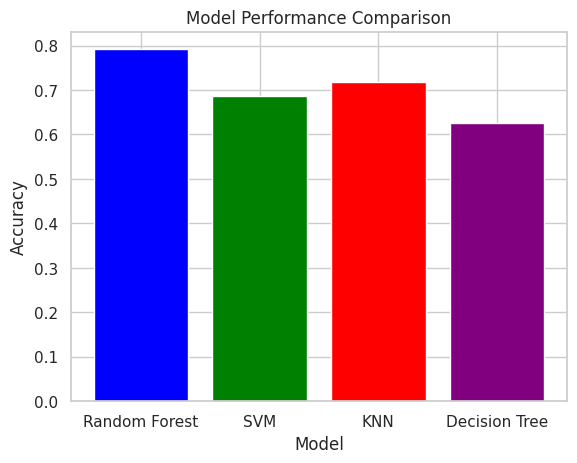

In [ ]:
# Consolidating Accuracy Results
models = ['Random Forest', 'SVM', 'KNN','Decision Tree']
accuracies = [rf_accuracy, svm_accuracy, knn_accuracy, dt_accuracy]

# Plot Results
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

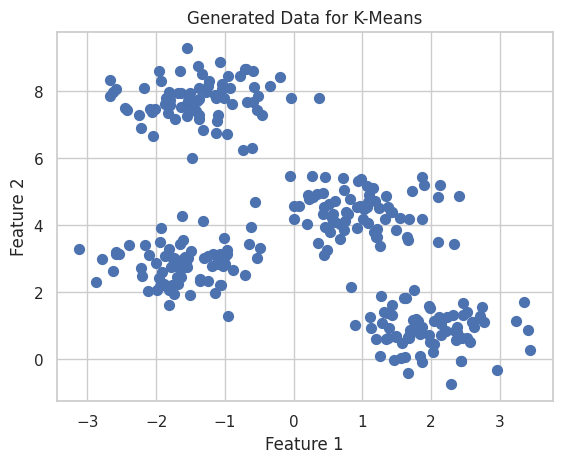

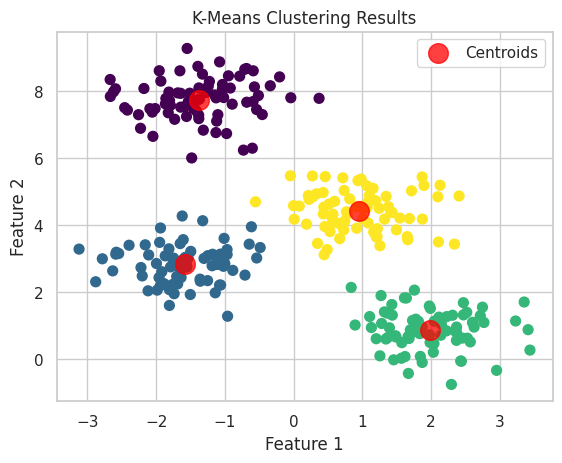

In [ ]:
# Generate synthetic data for clustering
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters with centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label="Centroids")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
